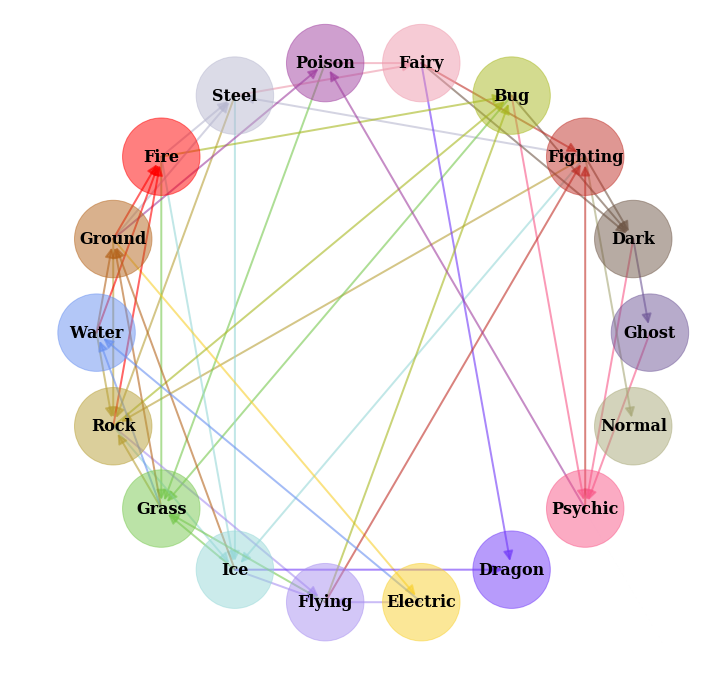

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12, 12)
import networkx as nx



## Create Pokemon Map
good = {}
good["Ghost"] = ["Ghost", "Dark"]
good["Dark"]  = ["Fighting", "Bug", "Fairy"]
good["Fairy"] = ["Poison", "Steel"]
good["Steel"] = ["Fire", "Fighting", "Ground"]
good["Fire"]  = ["Water", "Ground", "Rock"]
good["Rock"]  = ["Water", "Grass", "Fighting", "Ground", "Steel"]
good["Grass"] = ["Fire", "Ice", "Poison", "Flying", "Bug"]
good["Bug"]   = ["Fire", "Flying", "Rock"]
good["Flying"] = ["Electric", "Ice", "Rock"]
good["Electric"] = ["Ground"]
good["Ground"] = ["Water", "Grass", "Ice"]
good["Ice"]   = ["Fire", "Fighting", "Rock", "Steel"]
good["Dragon"] = ["Ice", "Dragon", "Fairy"]
good["Fairy"]  = ["Poison", "Steel"]
good["Poison"] = ["Ground", "Psychic"]
good["Psychic"] = ["Bug", "Ghost", "Dark"]
good["Normal"] = ["Fighting"]
good["Fighting"] = ["Flying", "Psychic", "Fairy"]
good["Water"] = ["Electric", "Grass"]

color_map = {"Bug": "A8B820", "Dark": "705848", "Dragon": "7038F8", "Electric": "F8D030", "Fairy": "EE99AC",
             "Fighting": "C03028", "Fire": 'FF0000', "Flying": "A890F0", "Ghost": "705898", "Grass": "78C850",
             "Ground": 'B5651D', "Ice": "98D8D8", "Normal": "A8A878", "Poison": "A040A0", "Psychic": "F85888",
             "Rock": "B8A038", "Steel": "B8B8D0", "Water": "6890F0"}


## Create Pokemon Network
G = nx.DiGraph()
for ptype,vals in good.items():
    for val in vals:
        G.add_edge(val, ptype, color="#{0}".format(color_map[ptype]))
        
        
node_colors = []
for node in G.nodes():
    node_colors.append("#{0}".format(color_map[node]))


nodes  = G.nodes(True)
labels = {n: n for n, attrs in nodes}
edges  = G.edges()
colors = [G[u][v]['color'] for u,v in edges]


## Render the Network and Save it
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=6000, node_shape='o', node_color=node_colors, alpha=0.5)
nx.draw_networkx_edges(G, pos, style='dotted', arrowsize=20, edge_color=colors, width=2, alpha=0.6)
nx.draw_networkx_labels(G, pos, labels, alpha=1, font_size=16, font_weight='bold', font_family='serif')
plt.axis('off')
plt.savefig("types.pdf", dpi=150)